# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este é um projeto proposto pela EBAC, no curso de Cientista de Dados.

O objetivo deste projeto é com base nos dados fornecidos, analisar qual fator influenciara na renda da população e possibilitar predizer, qual será a **previsão de renda**.

Definição do Problema: Identificar os desafios específicos que a previsão de renda visa resolver. Isso pode envolver a identificação de padrões, variações de renda e fatores que influenciam as mudanças de renda ao longo do tempo.

Objetivos da modelagem: O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a renda.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.



### Dicionário de dados
Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes.

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de coleta dos dados                           | object       |
| id_cliente              |  Id de identificação do cliente                     | int          |
| sexo                    |  M = Masculino / F = Feminino                       | object       |
| posse_de_veiculo        |  True = Possui Veiculo / False = Não possui Veiculo | bool         |
| posse_de_imovel         |  True = Possui Imovel / False = Não possui Imovel   | bool         |
| qtd_filhos              |  Quantidade de filhos do cliente                    | int          |
| tipo_renda              |  Tipo de renda (ex: Assalariado, Empresario e etc)  | object       |
| educacao                |  Nivel de educação(ex:Superior, Fundamental e etc)  | object       |
| estado_civil            |  Estado civil (ex:Casado, Solteiro e etc)           | object       |
| tipo_residencia         |  Tipo de residência (ex: casa/apartamento e etc)    | object       |
| idade                   |  Idade do cliente                                   | float        |
| tempo_emprego           |  Tempo de emprego com base em anos                  | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas que residem na residencia    | float        |
| renda                   |  Renda do Cliente                                   | float        |
| q_idade                 |  Idades divididas em quarters                       | object       |




#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tqdm as notebook_tqdm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_profiling import ProfileReport

sns.set_theme()
%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [53]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

**Dataframe na variável 'renda'.**

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

##### Analise utilizando Pandas_profiling:

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Para visualizar melhor esta análise acesse na versão html no caminho :

### './output/renda_analisys.html'

---


### Univariada renda : 

<Axes: ylabel='renda'>

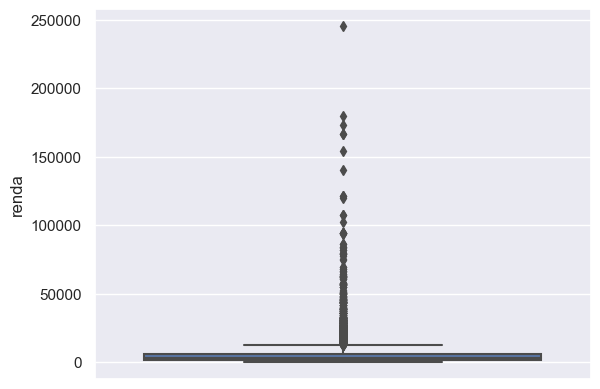

In [7]:
sns.boxplot(renda, y='renda')

sns.histplot(renda, x='renda', bins = 50)

renda['renda'].plot()
plt.ylim(0)
plt.xlim(0)
plt.ylabel('renda')

---
### Univariada qt_pessoas_residencia :

<Axes: xlabel='qt_pessoas_residencia'>

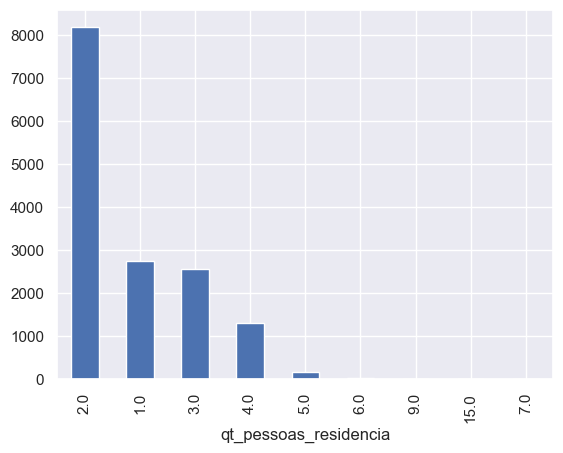

In [10]:
renda['qt_pessoas_residencia'].value_counts().plot.bar()

<Axes: ylabel='qt_pessoas_residencia'>

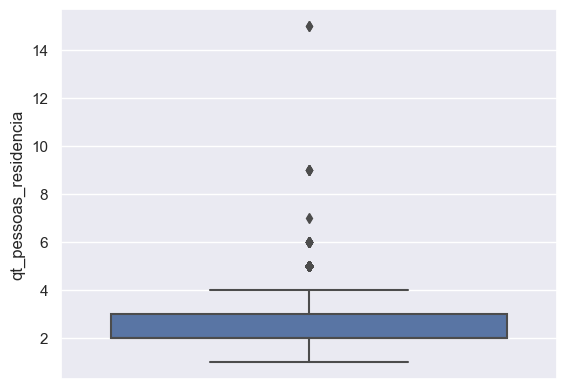

In [11]:
sns.boxplot(renda, y='qt_pessoas_residencia')

---
### Univariada tempo_emprego :

<Axes: xlabel='tempo_emprego', ylabel='Count'>

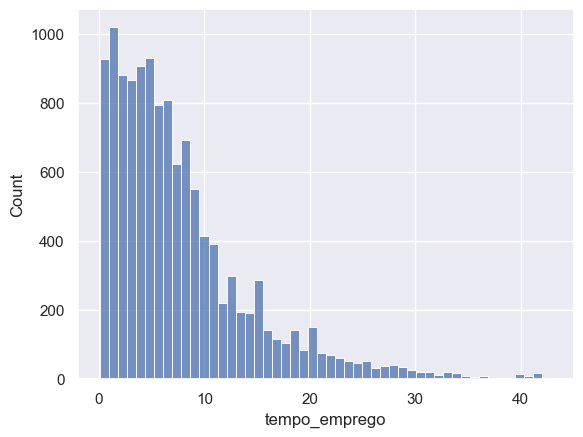

In [12]:
sns.histplot(renda, x='tempo_emprego', bins = 50)

<Axes: ylabel='tempo_emprego'>

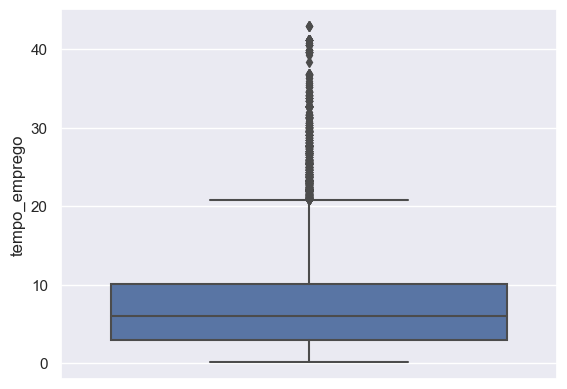

In [13]:
sns.boxplot(renda, y='tempo_emprego')

---
### Univariada idade :

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]


<Axes: xlabel='idade'>

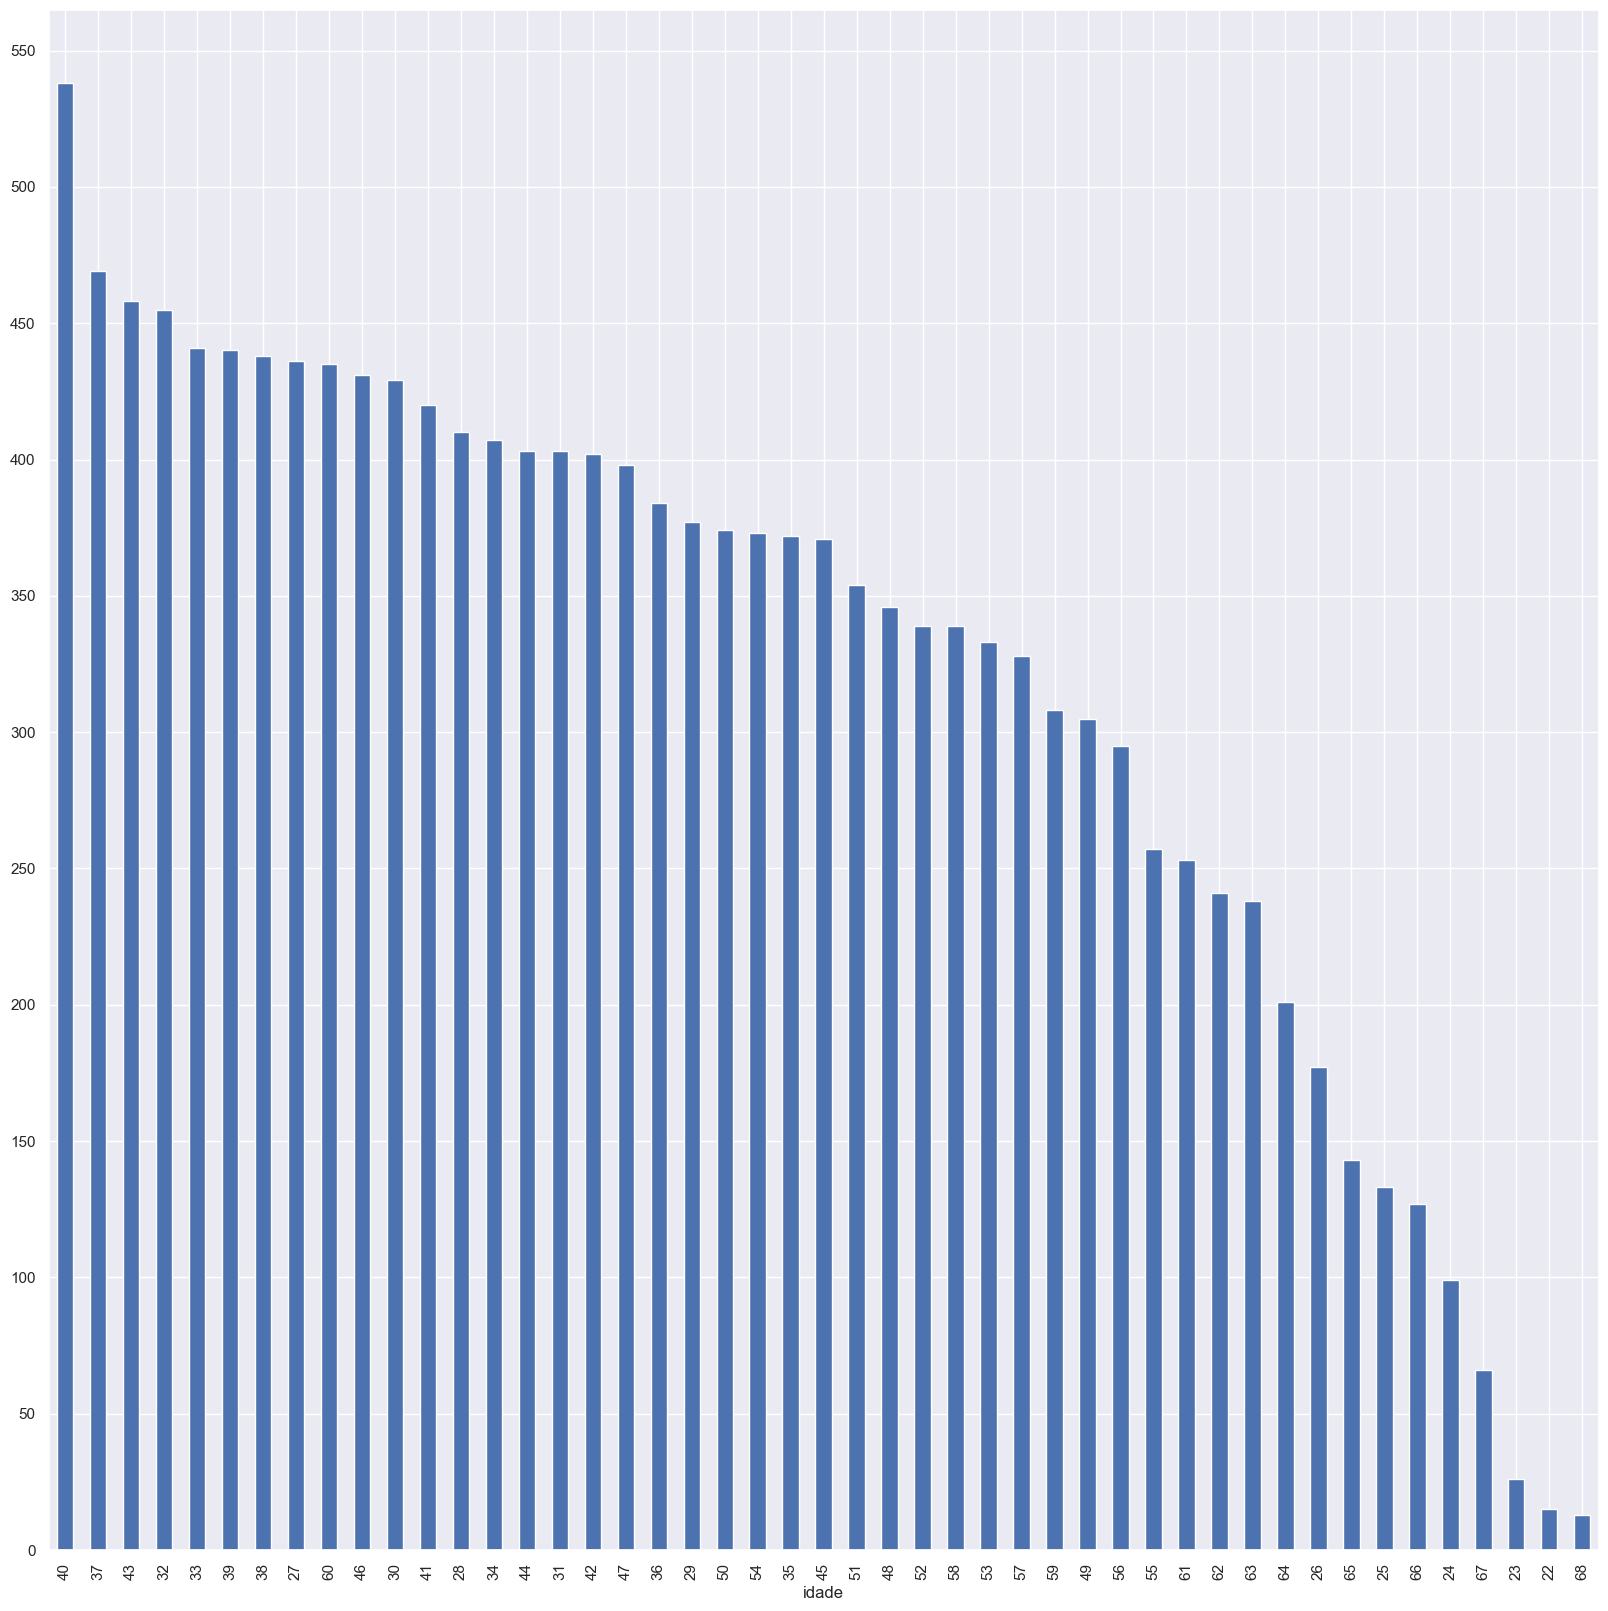

In [14]:
ticks = list(np.arange(0,600,50))
print(ticks)
fig, ax = plt.subplots(figsize=[20,20])
ax.yaxis.set_ticks(ticks)
renda['idade'].value_counts().plot.bar()


### Univariada tipo_residencia :

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Casa'),
  Text(1, 0, 'Governamental'),
  Text(2, 0, 'Com os pais'),
  Text(3, 0, 'Aluguel'),
  Text(4, 0, 'Estúdio'),
  Text(5, 0, 'Comunitário')])

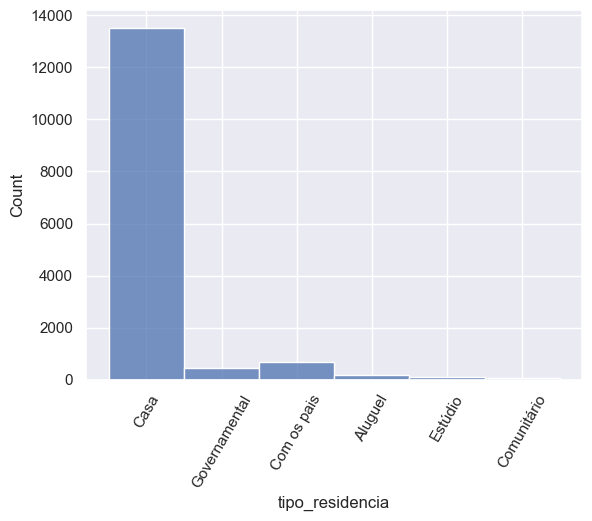

In [15]:
sns.histplot(renda, x='tipo_residencia')
plt.xticks(rotation = 60)

### Univariada estado_civil :

<Axes: xlabel='estado_civil', ylabel='Count'>

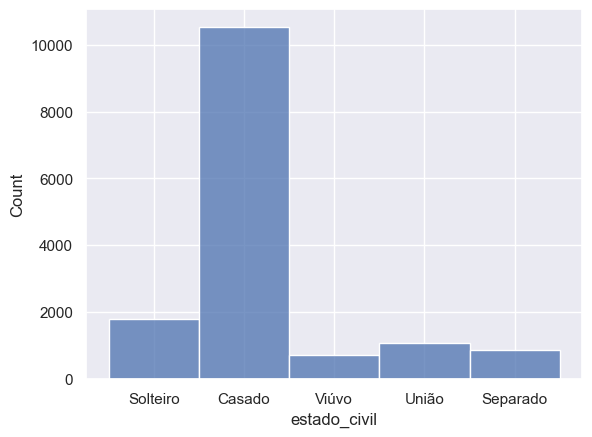

In [16]:
sns.histplot(renda, x='estado_civil')

### Univariada educacao :

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Secundário'),
  Text(1, 0, 'Superior completo'),
  Text(2, 0, 'Superior incompleto'),
  Text(3, 0, 'Primário'),
  Text(4, 0, 'Pós graduação')])

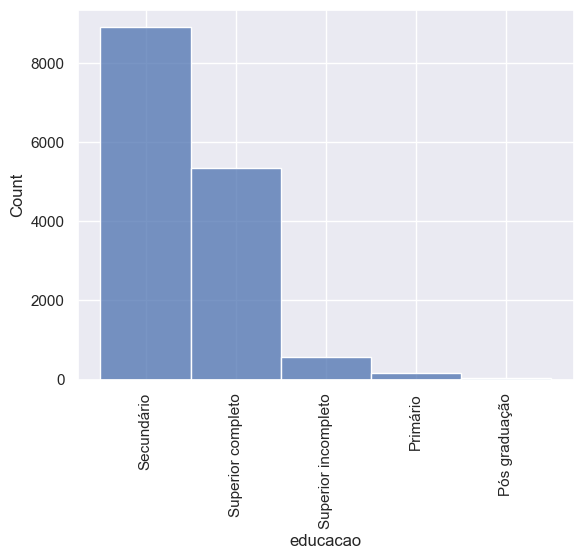

In [17]:
sns.histplot(renda, x='educacao')
plt.xticks(rotation=90)

### Univariada tipo_renda :

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Empresário'),
  Text(1, 0, 'Assalariado'),
  Text(2, 0, 'Servidor público'),
  Text(3, 0, 'Pensionista'),
  Text(4, 0, 'Bolsista')])

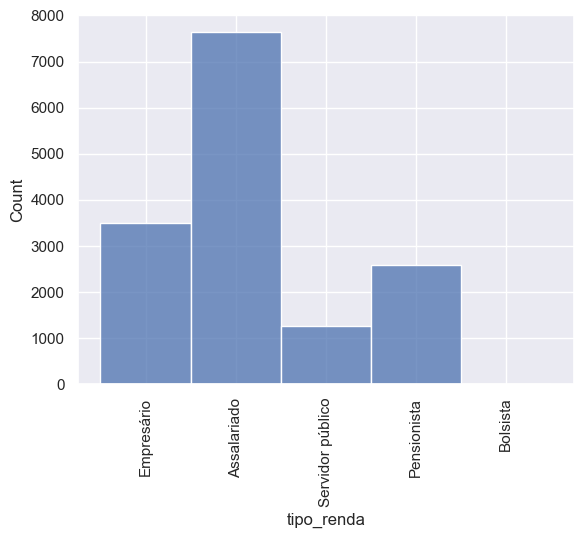

In [18]:
sns.histplot(renda, x='tipo_renda')
plt.xticks(rotation=90)

### Univariada qtd_filhos :


<Axes: xlabel='qtd_filhos', ylabel='Count'>

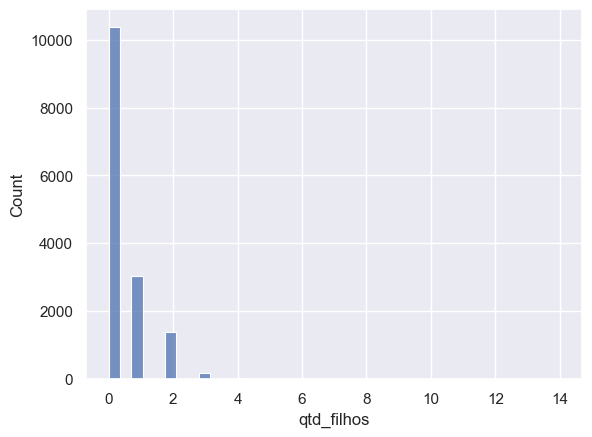

In [19]:
sns.histplot(renda, x='qtd_filhos', bins = 40)

<Axes: ylabel='qtd_filhos'>

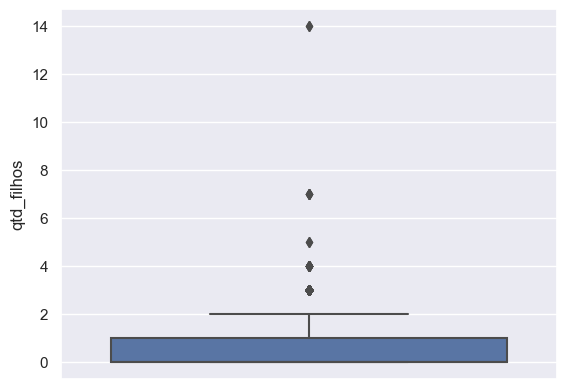

In [20]:
sns.boxplot(renda, y='qtd_filhos')

### Univariada posse_de_imovel : 

<Axes: xlabel='posse_de_imovel'>

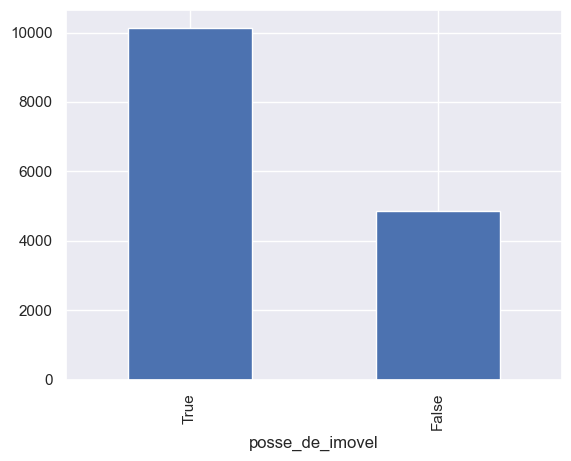

In [21]:
renda['posse_de_imovel'].value_counts().plot.bar()

### Univariada posse_de_veiculo :

<Axes: xlabel='posse_de_veiculo'>

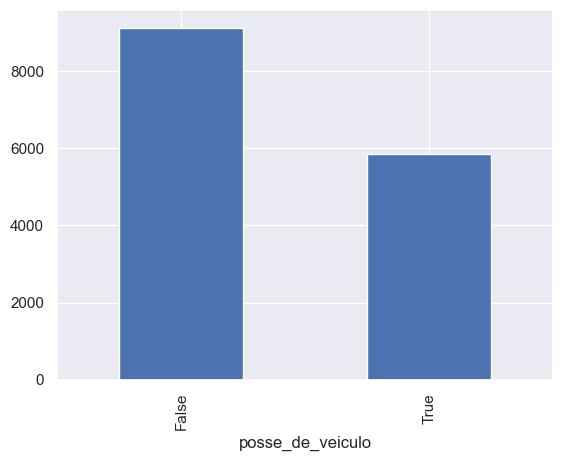

In [22]:
renda['posse_de_veiculo'].value_counts().plot.bar()

### Univariada sexo : 

<Axes: xlabel='sexo'>

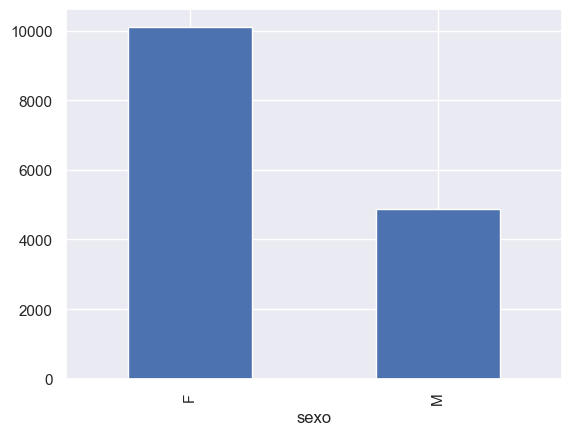

In [23]:
renda['sexo'].value_counts().plot.bar()

### Entendimento dos dados - Bivariadas




A primeira analise é de renda X sexo.

(0.0, 20000.0)

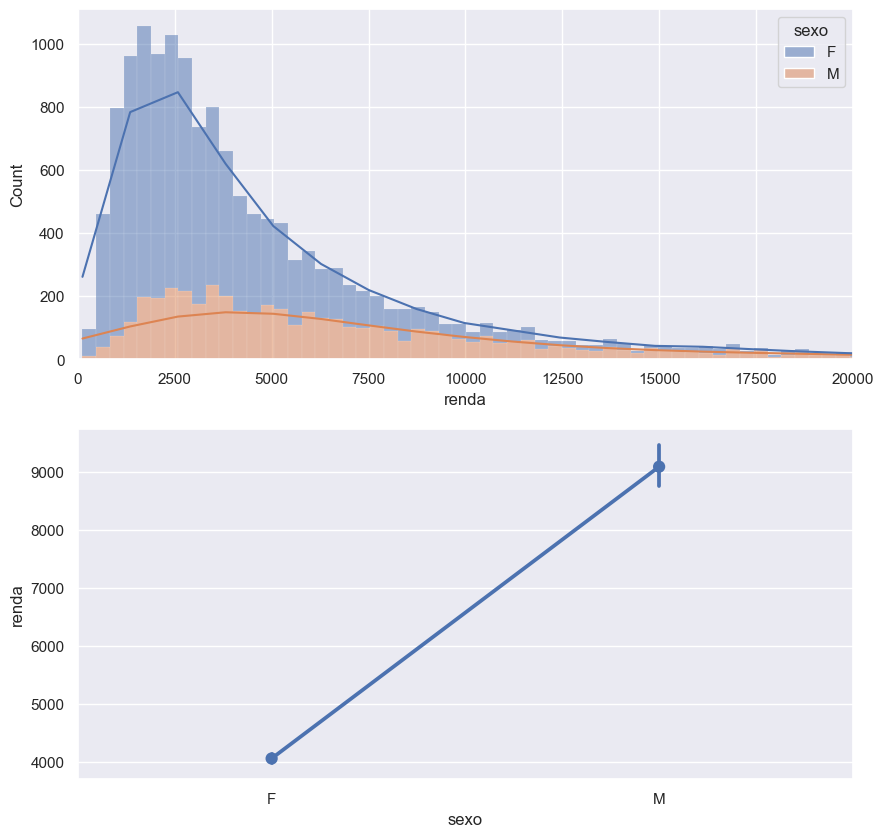

In [24]:
fig, axs = plt.subplots(2, figsize=[10,10])

sns.histplot(renda, x = 'renda', hue='sexo', multiple='stack', kde='True', ax = axs[0])
sns.pointplot(renda, y = 'renda', x = 'sexo', ax = axs[1])

axs[0].set_xlim(0, 20000)

- Esta analise com visualização se torna muito dificil pois há outlier em ['renda'].
- Nesta analise foi filtrado o grafico para renda abaixo de 20,000 pois ha um outlier acima.

---
A analise abaixo é de renda X idade

renda['q_idade'] = pd.qcut(renda['idade'], 4)

fig, axs = plt.subplots(2, figsize=[10,10])
g = sns.histplot(renda, x='renda', hue='q_idade', multiple='stack', ax = axs[0])
g = sns.pointplot(renda, y = 'renda', x = 'q_idade', ax = axs[1])


axs[0].set_xlim(0, 20000)

- O grafico parece normal.

---
A analise abaixo é renda X educacao

fig, axs = plt.subplots(2, figsize=[10,10])
sns.histplot(renda, 
            x = 'renda',
            hue = 'educacao', 
            multiple = 'stack',
            ax = axs[0]
            )
sns.pointplot(renda, 
              y = 'renda', 
              x = 'educacao',
              ax = axs[1]
             )

axs[0].set_xlim(0,20000)

- O grafico parece normal.

---
Analise renda X posse_de_imovel | renda X posse_de_veiculo

fig, axes = plt.subplots(2, 2, figsize=[10,10])

g = sns.histplot(renda, x = 'renda', hue = 'posse_de_imovel',multiple = 'stack' ,ax = axes[0,0])
g = sns.histplot(renda, x = 'renda', hue = 'posse_de_veiculo',multiple = 'stack', ax = axes[0,1])
g = sns.pointplot(renda, y = 'renda', x='posse_de_imovel', ax = axes[1,0])
g = sns.pointplot(renda, y = 'renda', x='posse_de_veiculo', ax = axes[1,1])


axes[0,0].set_title('Posse de Imovel x Renda')
axes[0,1].set_title('Posse de Veiculo x Renda')
axes[0,0].set_xlim(0, 20000)
axes[0,1].set_xlim(0, 20000)

---
Analise renda X tipo_renda

fig, axs = plt.subplots(2, figsize=[10,10])

sns.histplot(renda, x = 'renda', hue = 'tipo_renda', multiple = 'stack', ax = axs[0])

sns.pointplot(renda, y = 'renda', x = 'tipo_renda', ax = axs[1])

axs[0].set_xlim(0,20000)

renda['q_tempo_emprego'] =  pd.qcut(renda['tempo_emprego'], 3)

fig, axs = plt.subplots(2, figsize=[10,10])
sns.histplot(renda, x='renda', hue='q_tempo_emprego', multiple='stack', ax = axs[0])
sns.pointplot(renda, y = 'renda', x = 'q_tempo_emprego', ax = axs[1])

axs[0].set_xlim(0, 20000)

fig, axs = plt.subplots(2, figsize=[10,10])

sns.histplot(renda, x = 'renda', hue = 'qtd_filhos', multiple = 'stack', ax = axs[0])

sns.pointplot(renda, y = 'renda', x = 'qtd_filhos', ax = axs[1])

axs[0].set_xlim(0,20000)

fig, axs = plt.subplots(2, figsize=[10,10])

sns.histplot(renda, x = 'renda', hue = 'estado_civil', multiple = 'stack', ax = axs[0])

sns.pointplot(renda, y = 'renda', x = 'estado_civil', ax = axs[1])

axs[0].set_xlim(0,20000)

---
## INSIGHTS 

- Na analise renda x sexo percebemos que o sexo Masculino (M) tem uma media de renda acima do que o sexo Feminino (F).

- Na analise de renda x q_idade notamos que há uma renda menor em pessoas mais novas, entre 22 a 34 anos.

- Em renda x educacao percebesse que as pessoas com superior completo possuem uma renda maior que a maioria.

- Em renda x posse_de_veiculo as pessoas que possuem veiculo possuem uma renda maior que as pessoas sem veiculos

- Em renda x tipo_renda as pessoas que são servidores publicos possuem renda maior que as outras variaveis

- Na analise renda x q_tempo_emprego pessoas com um tempo de emprego maior possuem uma renda mais alta.

---

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?

---

## Seleção

Excluindo colunas que não servirão nos proximos passos e colunas que foram criadas.

In [32]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'q_idade', 'q_tempo_emprego'],
      dtype='object')

In [33]:
renda.drop(columns=['Unnamed: 0', 'id_cliente', 'data_ref', 'q_idade', 'q_tempo_emprego'], inplace=True)

## Limpeza

Realizando tratamento de dados faltantes da variavel tempo_emprego, tornando NA igual a 0.

In [34]:
renda.isnull().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [35]:
renda.tempo_emprego.fillna(0, inplace=True)

In [36]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          15000 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


## Formatação

Excluindo outlier em  `renda` e  `idade`

In [58]:
renda_ = renda['renda'] < 20000
renda = renda[renda_]

renda_ = renda['qtd_filhos'] < 14
renda = renda[renda_]

renda['renda'].max()

19988.61

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Modelo de Regressão Statsmodels

O modelo selecionado foi a "Árvore de regressão", da biblioteca `statsmodels`.

---


Avaliando quais variaveis tem relevancia.

In [103]:
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia ''', 
              data = renda).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:01:50   Log-Likelihood:            -1.1346e+05
No. Observations:               11916   AIC:                         2.270e+05
Df Residuals:                   11891   BIC:                         2.272e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -893.8245   1080.365     -0.827      0.408   -3011.517    1223.868
sexo[T.M]                         3152.3115     69.723     45.212      0.000    3015.643    3288.980
posse_de_veiculo[T.True]           110.1038     66.258      1.662      0.097     -19.773     239.981
posse_de_imovel[T.True]            304.0599     65.430      4.647      0.000     175.806     432.314
tipo_renda[T.Bolsista]             165.9516   1105.708      0.150      0.881   -2001.418    2333.321
tipo_renda[T.Empresário]           669.1929     69.673      9.605      0.000     532.623     805.763
tipo_renda[T.Pensionista]        -1692.6687   1105.960     -1.530      0.126   -3860.532     475.194
tipo_renda[T.Servidor público]     363.1092    105.035      3.457      0.001     157.223     568.996
educacao[T.Pós graduação]          127.1745    730.207      0.174      0.862   -1304.150    1558.499
educacao[T.Secundário]             -31.9924    333.413     -0.096      0.924    -685.536     621.551
educacao[T.Superior completo]      358.0081    334.704      1.070      0.285    -298.067    1014.083
educacao[T.Superior incompleto]   -303.1359    360.351     -0.841      0.400   -1009.482     403.211
estado_civil[T.Separado]          1133.6579    510.601      2.220      0.026     132.796    2134.520
estado_civil[T.Solteiro]           831.0347    499.530      1.664      0.096    -148.125    1810.194
estado_civil[T.União]             -115.9007    117.078     -0.990      0.322    -345.392     113.591
estado_civil[T.Viúvo]             1269.9138    530.649      2.393      0.017     229.755    2310.073
tipo_residencia[T.Casa]           -535.5754    251.687     -2.128      0.033   -1028.924     -42.227
tipo_residencia[T.Com os pais]    -341.2554    280.016     -1.219      0.223    -890.132     207.621
tipo_residencia[T.Comunitário]    -640.2452    487.726     -1.313      0.189   -1596.268     315.778
tipo_residencia[T.Estúdio]          57.3960    473.456      0.121      0.904    -870.655     985.447
tipo_residencia[T.Governamental] -1125.1724    308.356     -3.649      0.000   -1729.600    -520.745
qtd_filhos                        -814.5535    494.940     -1.646      0.100   -1784.718     155.611
idade                               18.2469      3.761      4.851      0.000      10.874      25.620
tempo_emprego                      250.2456      5.162     48.478      0.000     240.127     260.364
qt_pessoas_residencia              959.5503    493.959      1.943      0.052      -8.690    1927.790
==============================================================================
Omnibus:                     2540.565   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5290.592
Skew:             

--- 
Modelagem apenas com variaveis relevantes.

In [74]:
reg =  smf.ols('np.log(renda) ~ C(sexo, Treatment(1)) + np.log(idade) + tempo_emprego + posse_de_imovel + tipo_renda + posse_de_veiculo + C(educacao, Treatment(2))', data=renda).fit()
renda['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     349.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:26:56   Log-Likelihood:                -12268.
No. Observations:               11916   AIC:                         2.456e+04
Df Residuals:                   11902   BIC:                         2.467e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            7.4408      0.104     71.236      0.000       7.236       7.646
C(sexo, Treatment(1))[T.F]                          -0.6628      0.014    -46.753      0.000      -0.691      -0.635
posse_de_imovel[T.True]                              0.0831      0.013      6.323      0.000       0.057       0.109
tipo_renda[T.Bolsista]                               0.2695      0.226      1.190      0.234      -0.174       0.713
tipo_renda[T.Empresário]                             0.1436      0.014     10.104      0.000       0.116       0.171
tipo_renda[T.Pensionista]                           -0.2645      0.226     -1.169      0.242      -0.708       0.179
tipo_renda[T.Servidor público]                       0.0556      0.021      2.586      0.010       0.013       0.098
posse_de_veiculo[T.True]                             0.0429      0.013      3.193      0.001       0.017       0.069
C(educacao, Treatment(2))[T.Primário]                0.0365      0.068      0.537      0.591      -0.097       0.170
C(educacao, Treatment(2))[T.Pós graduação]           0.1226      0.133      0.919      0.358      -0.139       0.384
C(educacao, Treatment(2))[T.Superior completo]       0.0927      0.013      6.948      0.000       0.067       0.119
C(educacao, Treatment(2))[T.Superior incompleto]    -0.0288      0.031     -0.938      0.348      -0.089       0.031
np.log(idade)                                        0.1752      0.029      6.103      0.000       0.119       0.231
tempo_emprego                                        0.0506      0.001     47.930      0.000       0.049       0.053
==============================================================================
Omnibus:                       53.992   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.681
Skew:                          -0.153   Prob(JB):                     2.20e-12
Kurtosis:                       2.879   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

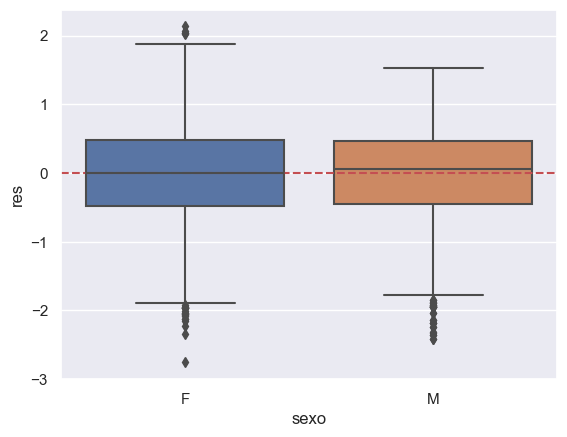

In [63]:
sns.boxplot(x = 'sexo', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

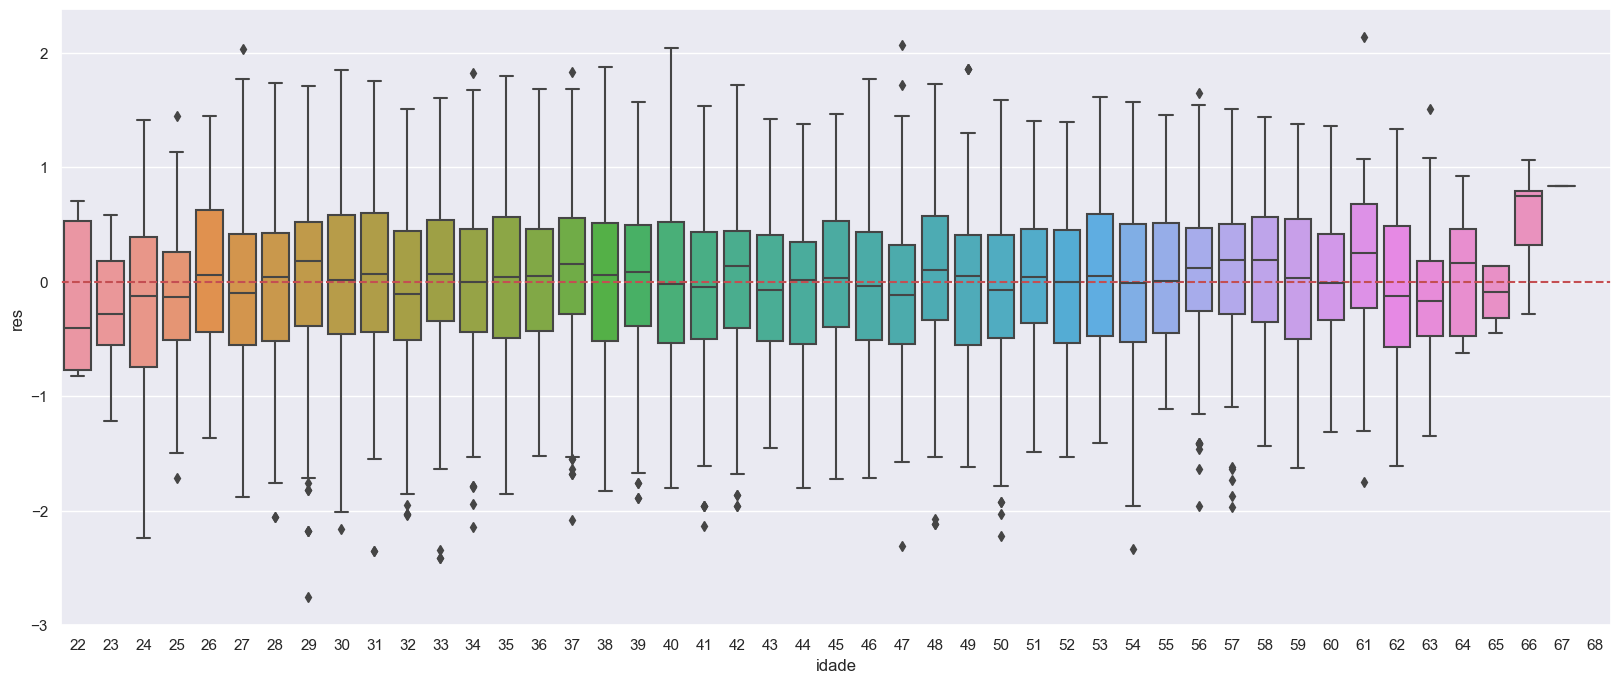

In [64]:
plt.figure(figsize=[20,8])
sns.boxplot(x ='idade', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

(0.3, 45.04630136986301)

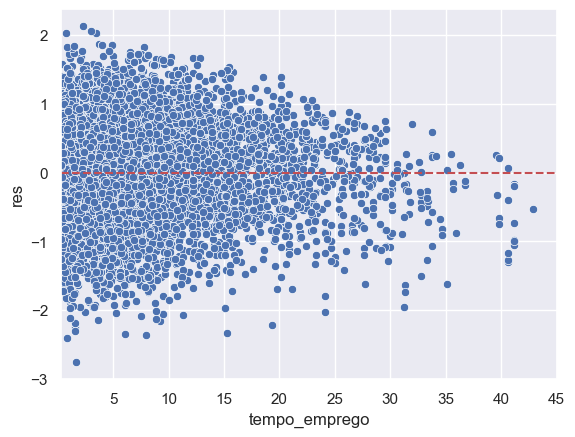

In [65]:
sns.scatterplot(x ='tempo_emprego', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlim(0.3)

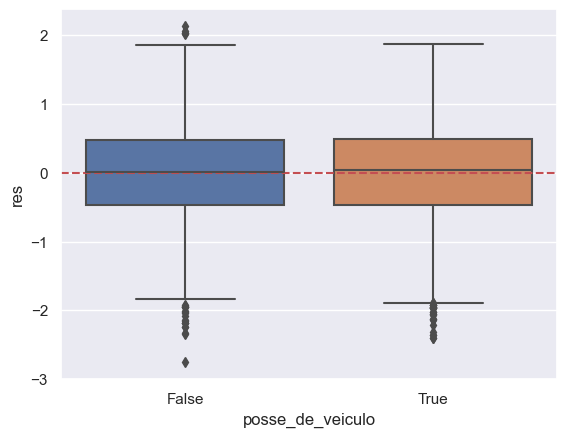

In [66]:
sns.boxplot(x ='posse_de_veiculo', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

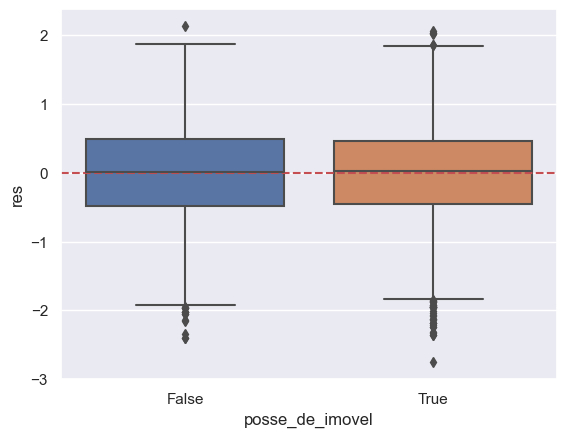

In [67]:
sns.boxplot(x ='posse_de_imovel', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

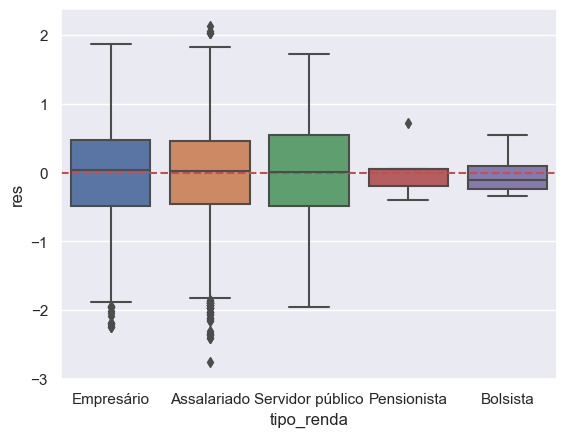

In [68]:
sns.boxplot(x ='tipo_renda', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

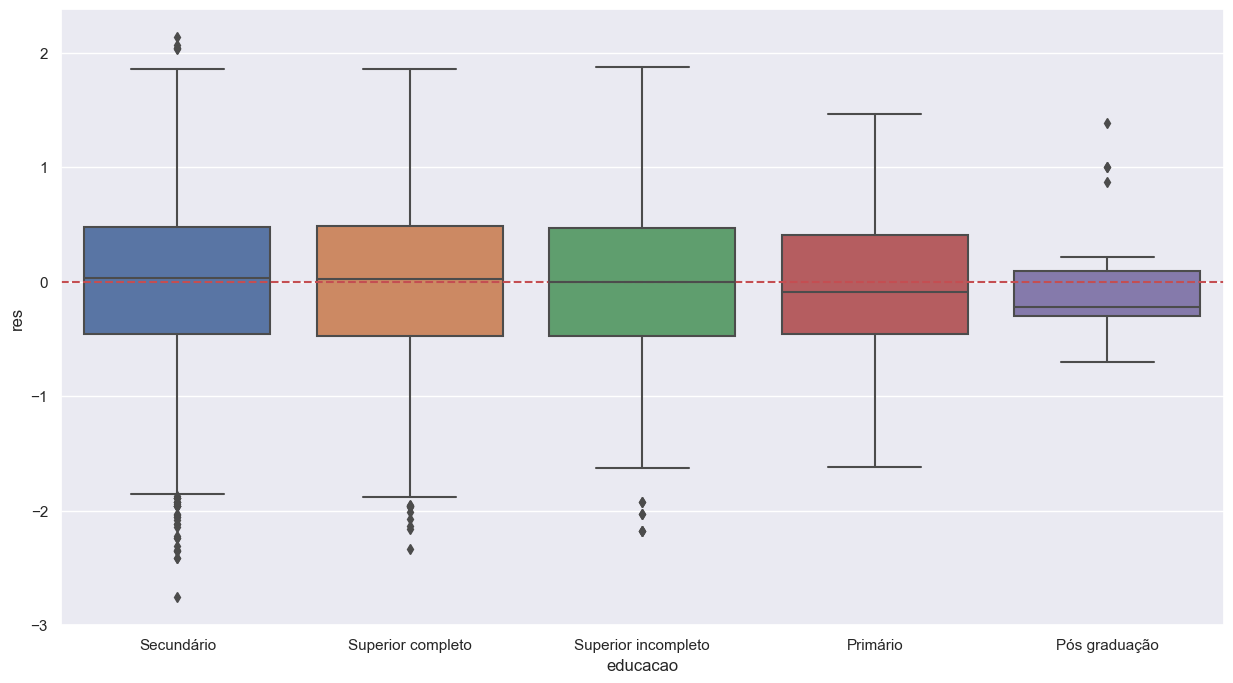

In [69]:
plt.figure(figsize=[15,8])
sns.boxplot(x ='educacao', y = 'res', data = renda)
plt.axhline(y=0, color='r', linestyle='--')

## Etapa 5 Crisp-DM: Avaliação dos resultados

In [94]:
print(f'O modelo criado possui r-quadrado de {reg.rsquared*100:2f}')
print(f'O modelo criado possui AIC de {reg.aic*100:2f}')

O modelo criado possui r-quadrado de 27.613719
O modelo criado possui AIC de 2456312.721243


Nota-se pelo modelo criado que as variaveis que possuem mais importancia para a predefinição de renda são `sexo, idade, tempo_emprego, posse_de_imovel, tipo_renda, posse_de_veiculo e educacao`

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.